In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
cd C:\python related\fastai

C:\python related\fastai


In [3]:
from fastai.conv_learner import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
arch=resnext101_64

In [5]:
PATH ="C:/Users/admin/Desktop/45_top_roof/" 

In [6]:
label_csv= f'{PATH}labels.csv'
n=len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [7]:
def get_data(sz,bs):
    tfms=tfms_from_model(arch, sz, aug_tfms=transforms_top_down,max_zoom=1.1)
    data=ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',test_name='test',num_workers=4,
                                  val_idxs=val_idxs,suffix='.jpg',tfms=tfms,bs=bs)
    return data if sz>300 else data.resize(340,'tmp')

In [8]:
learn = ConvLearner.pretrained(arch,get_data(128,10),precompute=True)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [9]:
learn.fit(0.0025,1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      1.094905   0.735745   0.710526  



[0.73574525, 0.7105263126523871]

In [9]:
learn.precompute=False

In [10]:
learn.fit(0.0025,3,cycle_len=2,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      1.047337   0.790557   0.694737  
    1      0.901853   0.740711   0.718421                                      
    2      0.944017   0.710935   0.7                                           
    3      0.839106   0.677871   0.723684                                      
    4      0.78139    0.687236   0.728947                                      
    5      0.829066   0.685289   0.721053                                      
    6      0.798702   0.713715   0.723684                                      
    7      0.835192   0.694386   0.736842                                      
    8      0.781453   0.660521   0.75                                          
    9      0.762389   0.675494   0.731579                                      
    10     0.71981    0.651968   0.765789                                      
    11     0.668231   0.625537   0.763158                                   

[0.62504, 0.7710526271870262]

In [11]:
lr=0.0025
lrs= np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.bn_freeze(True)

In [12]:
learn.fit(lrs,2,cycle_len=2,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      1.087849   0.839694   0.673684  
    1      0.747818   0.657045   0.731579                                      
    2      0.857808   0.800711   0.707895                                      
    3      0.681105   0.548005   0.778947                                      
    4      0.482625   0.521697   0.815789                                      
    5      0.408998   0.45001    0.834211                                      



[0.45000973, 0.8342105216885868]

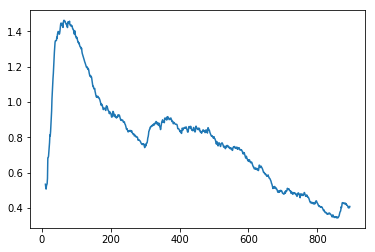

In [13]:
learn.sched.plot_loss()

In [14]:
learn.save('45_type_res101')

In [12]:
learn.load('45_type_res101')

In [28]:
learn.set_data(get_data(256,5))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [29]:
learn.freeze()
learn.fit(0.002,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.376022   0.456758   0.850667  
    1      0.444866   0.459038   0.842667                                      
    2      0.392767   0.464406   0.837333                                      
    3      0.458624   0.50721    0.829333                                      
    4      0.418079   0.477186   0.832                                         
    5      0.318718   0.462265   0.848                                         
    6      0.353512   0.44151    0.856                                         



[0.4415097, 0.8560000060002009]

In [31]:
learn.save('45_type_res101')

In [14]:
learn.load('45_type_res101')

In [27]:
learn.freeze()
learn.fit(0.002,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.129977   0.330079   0.902632  
    1      0.126438   0.342032   0.886842                                      
    2      0.110216   0.342365   0.892105                                      
    3      0.122587   0.335631   0.894737                                      
    4      0.124645   0.343857   0.897368                                      



[0.34385678, 0.8973684185429623]

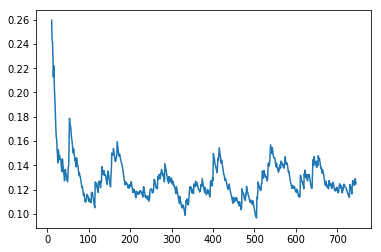

In [28]:
learn.sched.plot_loss()

In [10]:
learn.set_data(get_data(500,5))

In [15]:
learn.fit(0.002,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.861149   0.469517   0.829333  
    1      0.674875   0.483616   0.818667                                      
    2      0.7417     0.471676   0.824                                         



[0.47167593, 0.8240000069141388]

In [16]:
lr=0.002
lrs= np.array([lr/9,lr/3,lr])
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.652587   0.478341   0.802667  
    1      0.588298   0.443993   0.842667                                      
    2      0.572753   0.413714   0.850667                                      
    3      0.664576   0.479893   0.832                                         
    4      0.56774    0.419581   0.858667                                      
    5      0.614655   0.429554   0.832                                         
    6      0.54791    0.407386   0.850667                                      



[0.407386, 0.8506666727860769]

In [17]:
learn.save('45_top_roof_res101')

In [15]:
learn.load('45_top_roof_res101')

In [15]:
learn.fit(0.002,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.579885   0.458729   0.84      
    1      0.641549   0.42089    0.829333                                      
    2      0.565723   0.430086   0.861333                                      



[0.43008617, 0.861333339413007]

In [16]:
log_preds,y=learn.TTA()
probs = np.mean(np.exp(log_preds), axis=0)
probs.shape

(371, 4)

In [17]:
a=accuracy_np(probs, y)
a

0.8840970350404312

In [18]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[107   1   5   0]
 [  7  68   1   2]
 [  1   1  72  11]
 [  4   4   6  81]]


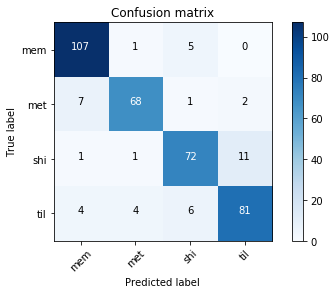

In [20]:
data = get_data(500,5)
plot_confusion_matrix(cm, data.classes)

In [21]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most incorrect membrane


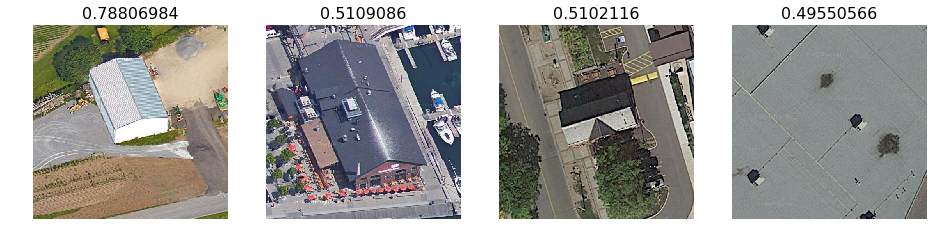

In [31]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect membrane")

Most correct membrane


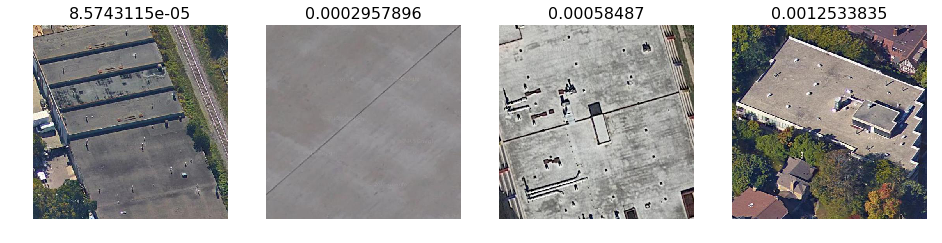

In [42]:
plot_val_with_title(most_by_correct(0, True), "Most correct membrane")

In [34]:
log_preds,y=learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds), axis=0)
probs.shape

(588, 4)

In [36]:
data = get_data(500,5)
ds = pd.DataFrame(probs)
ds.columns= data.classes

In [37]:
ds

,mem,met,shi,til
0,0.979027,0.000997,0.017565,0.002411
1,0.224203,0.015699,0.731048,0.029049
2,0.841481,0.033236,0.084216,0.041067
3,0.994122,0.001446,0.003053,0.001379
4,0.942838,0.031418,0.007250,0.018494
5,0.480283,0.013204,0.221317,0.285195
6,0.980631,0.007840,0.008228,0.003300
7,0.724848,0.221680,0.016982,0.036490
8,0.895583,0.091411,0.002330,0.010675
9,0.637288,0.175646,0.143259,0.043808


In [38]:
ds.insert(0,'id',[o[5:-4] for o in data.test_ds.fnames])

In [39]:
ds.to_csv("test_roof_prediction.csv", encoding='utf-8',index=False)